In [2]:
pip install pandas numpy seaborn

Note: you may need to restart the kernel to use updated packages.


# Bank Marketing Dataset Exploration
Initial exploration of Kaggle’s Bank Marketing dataset for customer segmentation.

Exploration Code

In [3]:
import pandas as pd

# Load dataset with full path
df = pd.read_csv(r'C:\Users\Lewis\Documents\Customer-Segmentation-Project\data\bank.csv')

# Basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nNumerical Features Summary:\n", df.describe())
print("\nCategorical Features Value Counts:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df[col].value_counts())

# Sample data
print("\nSample Data:\n", df.head())

Dataset Shape: (11162, 17)

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Numerical Features Summary:
                 age       balance           day      duration      campaign  \
count  11162.000000  1116

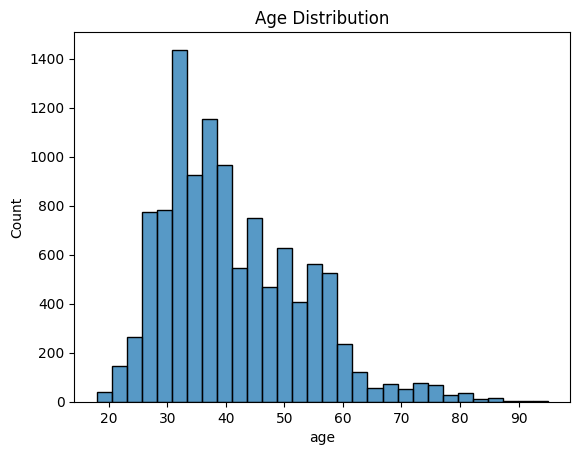

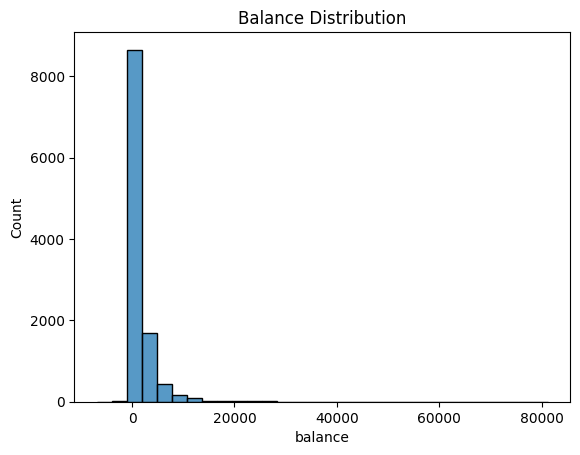

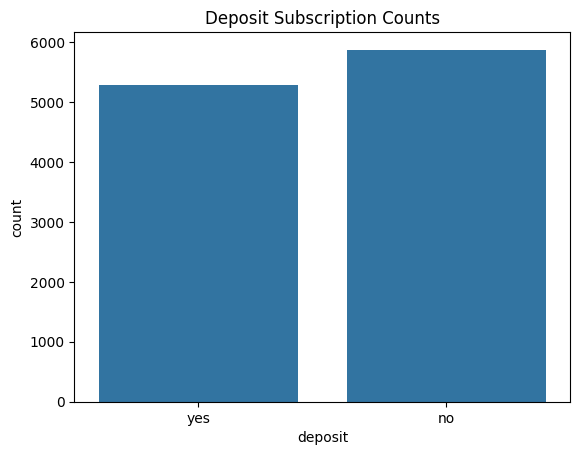

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.savefig('age_distribution.png')
plt.show()

# Balance distribution
sns.histplot(df['balance'], bins=30)
plt.title('Balance Distribution')
plt.savefig('balance_distribution.png')
plt.show()

# Deposit counts
sns.countplot(x='deposit', data=df)
plt.title('Deposit Subscription Counts')
plt.savefig('deposit_counts.png')
plt.show()

Data Preprocessing

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv(r'C:\Users\Lewis\Documents\Customer-Segmentation-Project\data\bank.csv')
balance_cap = df['balance'].quantile(0.99)
df['balance'] = df['balance'].clip(upper=balance_cap)
df['pdays'] = df['pdays'].replace(-1, 0)
numeric_features = ['age', 'balance', 'pdays']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'deposit']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])
X = preprocessor.fit_transform(df)
print("Preprocessed Data Shape:", X.shape)
np.save('preprocessed_data.npy', X)

Preprocessed Data Shape: (11162, 22)


Clustering Analysis

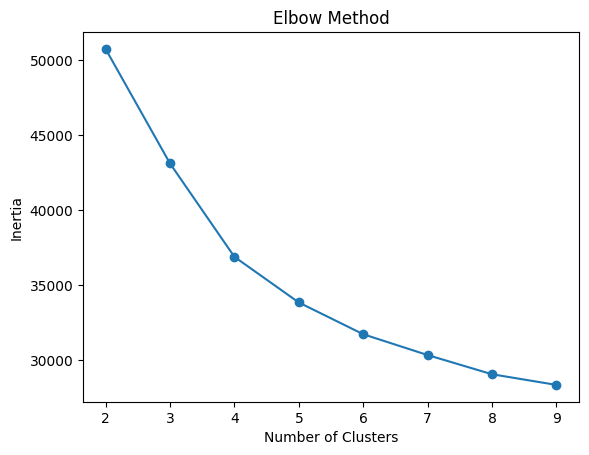

Final Silhouette Score with 4 Clusters: 0.18943169679354777
Cluster Distribution (4 Clusters):
 3    5672
0    3277
2    1460
1     753
Name: count, dtype: int64
Cluster Summary:
                age      balance       pdays  deposit_numeric
Cluster                                                     
0        54.792188  1120.157156   23.564846         0.474214
1        43.629482  8417.344967   44.018592         0.565737
2        38.195205  1021.001370  286.327397         0.580822
3        33.860896   780.030324    9.320874         0.433886


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Elbow Method (for reference)
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig('elbow_method.png')
plt.show()

# Fit 4 clusters (preferred)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)
score = silhouette_score(X, clusters)
print("Final Silhouette Score with 4 Clusters:", score)
print("Cluster Distribution (4 Clusters):\n", pd.Series(clusters).value_counts())

# Add clusters to dataframe and convert deposit
df['Cluster'] = clusters
df['deposit_numeric'] = df['deposit'].map({'no': 0, 'yes': 1})
cluster_summary = df.groupby('Cluster')[['age', 'balance', 'pdays', 'deposit_numeric']].mean()
print("Cluster Summary:\n", cluster_summary)

Visualization

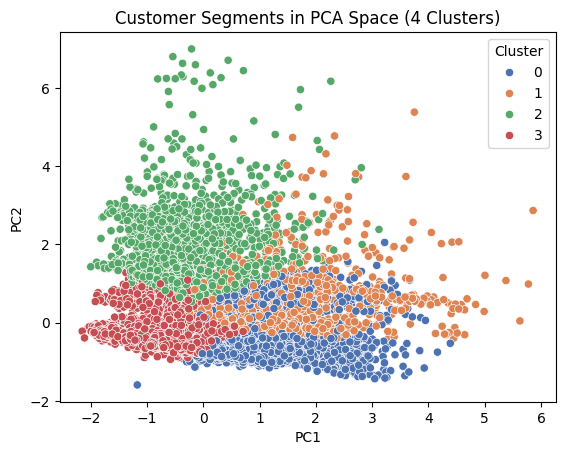

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('Customer Segments in PCA Space (4 Clusters)')
plt.savefig('pca_4_clusters.png')
plt.show()

df.to_csv('clustered_data.csv', index=False)